In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train-directory',  
        target_size=(150, 150), 
        batch_size=16,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'validation-directory',
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)


Found 300 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 6s 274ms/step - loss: 0.7109 - accuracy: 0.5767 - val_loss: 0.5727 - val_accuracy: 0.8000
Epoch 2/10
18/18 [==============================] - 5s 291ms/step - loss: 0.3504 - accuracy: 0.8933 - val_loss: 0.0544 - val_accuracy: 0.9833
Epoch 3/10
18/18 [==============================] - 5s 245ms/step - loss: 0.1626 - accuracy: 0.9400 - val_loss: 0.1448 - val_accuracy: 0.9500
Epoch 4/10
18/18 [==============================] - 5s 258ms/step - loss: 0.1518 - accuracy: 0.9433 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 5s 253ms/step - loss: 0.0577 - accuracy: 0.9800 - val_loss: 0.0175 - val_accuracy: 0.9833
Epoch 6/10
18/18 [==============================] - 5s 265ms/step - loss: 0.1111 - accuracy: 0.9567 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 5s 246ms/step -

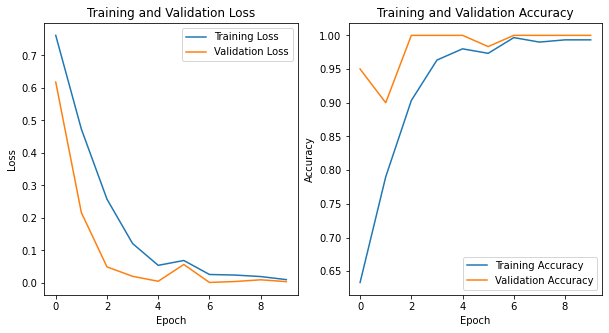

In [3]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

plot_history(history)

